## Data Science Assignment - 1.b

Submitted By : Subrat Nanda

### Take MINST dataset. Implement Logistic regression to predict number from Handwritten digits.

#### 1.Import necessary libraries and modules.

In [ ]:
# Import Necessary Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.utils
from keras import utils as np_utils
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


#### 2.Load the MNIST dataset.

Split the dataset into training and testing sets.

In [ ]:
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 3.Preprocess the data by normalizing and flattening the images.

Dimension of the training data is (60000*28*28).

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Feature Normalization
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Convert labels to One Hot Encoded
# num_digits = 10
# y_train = keras.utils.to_categorical(y_train, num_digits)
# y_test = keras.utils.to_categorical(y_test, num_digits)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Display size of train and test x

print('Shape of Train Image : ',x_train.shape)
print('Shape of Test Image : ',x_test.shape)
print("Length of Train = ",str(len(x_train)))
print("Length of Test = ",str(len(x_test)))

Shape of Train Image :  (60000, 784)
Shape of Test Image :  (10000, 784)
Length of Train =  60000
Length of Test =  10000


In [ ]:
# Display size of train and test y

print('Shape of Train Image : ',y_train.shape)
print('Shape of Test Image : ',y_test.shape)
print("Length of Train = ",str(len(y_train)))
print("Length of Test = ",str(len(y_test)))

Shape of Train Image :  (60000,)
Shape of Test Image :  (10000,)
Length of Train =  60000
Length of Test =  10000


#### 4.Displaying the data.

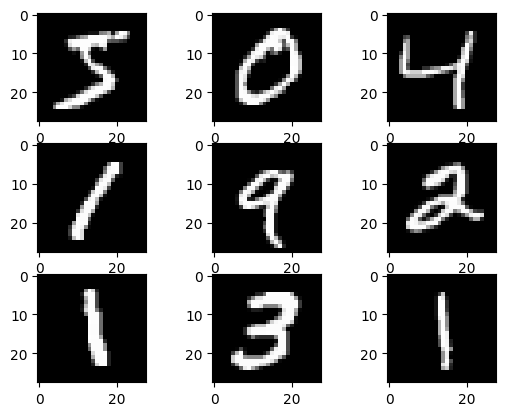

In [ ]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### Q) b. Create a 5/not-5 binary classifier

Creating a binary classifier for distinguishing between the number 5 and other numbers.

In [ ]:
# Creating a binary classifier for distinguishing between 5 and not-5 digits
y_train_binary = (y_train == 5).astype(np.int)
y_test_binary = (y_test == 5).astype(np.int) #np.array([1 if label == '5' else 0 for label in y_test]) or alternative np.where(y_test == 5, 1, 0)

<ipython-input-63-c4bec7ec439e>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_binary = (y_train == 5).astype(np.int)
<ipython-input-63-c4bec7ec439e>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy

In [ ]:
y_train_binary

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_binary

array([0, 0, 0, ..., 0, 1, 0])

#### 5.Implement logistic regression using scikit-learn's LogisticRegression module.

Train the model using the training set.

In [ ]:
# fit a model
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(x_train, y_train_binary)
# predict probabilities
yhat = lr.predict_proba(x_test)

In [ ]:
y_pred_test = lr.predict(x_test)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lr.score(x_train, y_train_binary)))

print('Test set score: {:.4f}'.format(lr.score(x_test, y_test_binary)))

Training set score: 0.9773
Test set score: 0.9779


In [ ]:
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
yhat

array([3.28932790e-04, 6.38848654e-02, 1.07460328e-02, ...,
       3.63633605e-03, 9.94401706e-01, 8.47294435e-05])

In [ ]:
pd.crosstab(y_test_binary, y_pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,9040,68,9108
1,153,739,892
All,9193,807,10000


In [ ]:
# Calculate precision & recall score
precision = precision_score(y_test_binary, y_pred_test)
recall = recall_score(y_test_binary, y_pred_test)

# Print the precision score
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9157372986369269
Recall: 0.82847533632287


#### 6.Change the threshold to improve precision.

Precision: Precision is a measure of the accuracy of a classifier. It is the ratio of true positive predictions to the total number of positive predictions.

precision=TP/TP+FP

where,  TP
  is the number of true positives

FP
  is the number of false positives

In [ ]:
# Change threshold to improve precision
#y_pred_precision = (lr.predict_proba(x_test)[:, 1] > 0.7).astype(int)

new_threshold = 0.7
y_pred_precision = (yhat >= new_threshold).astype(int)

In [ ]:
# Calculate precision score
precision = precision_score(y_test_binary, y_pred_precision)

# Print the precision score
print("Precision:", precision)

Precision: 0.9523809523809523


#### 7.Change the threshold to improve recall.


Recall: Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset.  It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances

recall=TP/TP+FN

where, TP
 is true positives

and FN
 is false negetives

In [ ]:
# Change threshold to improve recall
#y_pred_recall = (lr.predict_proba(x_test)[:, 1] > 0.3).astype(int)

# Set a new threshold to improve recall
new_threshold = 0.3
y_pred_recall = (yhat >= new_threshold).astype(int)

In [ ]:
# Calculate recall score
recall = recall_score(y_test_binary, y_pred_recall)

# Print the recall score
print("Recall:", recall)

Recall: 0.8789237668161435


#### 8.Show the change in the confusion matrix before and after improvising recall.

In [ ]:
# Calculate confusion matrix before changing threshold
confusion_matrix_before = confusion_matrix(y_test_binary, y_pred_precision)

In [ ]:
# Calculate confusion matrix after changing threshold for recall
confusion_matrix_after = confusion_matrix(y_test_binary, y_pred_recall)

In [ ]:
# Use the confusion matrix before and after changing the threshold
print("Confusion Matrix Before:")
print(confusion_matrix(y_test_binary, y_pred_test))
print("\nConfusion Matrix Before Improvising Recall:")
print(confusion_matrix_before)
print("\nConfusion Matrix After Improvising Recall:")
print(confusion_matrix_after)

Confusion Matrix Before:
[[9040   68]
 [ 153  739]]

Confusion Matrix Before Improvising Recall:
[[9075   33]
 [ 232  660]]

Confusion Matrix After Improvising Recall:
[[8955  153]
 [ 108  784]]


#### 9.Draw a precision-recall curve with recall on the x-axis and precision on the y-axis.

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_binary, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.090112, G-Mean=0.935


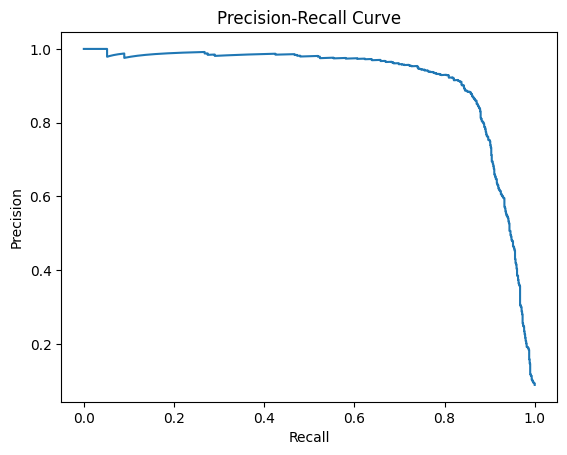

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


The reason why the precision curve is more bumpy than the recall curve is that precision may sometimes go down when the threshold is raised, although generally it will go up. (for reason: check out the caption of the above image in the book)

Alright, now we can select the threshold that gives the best precision/recall tradeoff for the task in hand.

Difference between Linear Regression and SGD Regressor :

In terms of model performance, the main difference between Linear Regression and SGD Regressor is their ability to handle large datasets and noisy data.

Linear Regression performs well when the dataset is small and the relationship between the independent and dependent variables is linear. However, when the dataset is large and noisy, Linear Regression may suffer from overfitting or underfitting, which can result in poor performance.

On the other hand, SGD Regressor is designed to handle large datasets and noisy data by updating the model parameters after each training example. This makes it more robust to noisy data and less likely to overfit or underfit the data. As a result, SGD Regressor can often achieve better performance than Linear Regression on large and complex datasets.

In summary, while Linear Regression is suitable for small and simple datasets with linear relationships, SGD Regressor is a more powerful algorithm that can handle large and complex datasets with noisy data, resulting in better model performance.